In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

def topic_sentiment_heatmap(excel_path,
                            topic_col="reduced_topic",    # full label kept
                            sent_col="finbert_sentiment",
                            conf_col="finbert_confid",
                            min_conf=0.7,
                            top_n=20):
    """
    Draw a Topic × Sentiment heat-map.
    • Uses the FULL text in `reduced_topic` (no truncation).
    • Keeps only the `top_n` most-frequent topics so the plot stays readable.
    """
    df = pd.read_excel(excel_path)
    df.columns = df.columns.str.lower()
    topic_col = topic_col.lower()

    # fall back gracefully if caller supplied the wrong name
    if topic_col not in df.columns:
        raise KeyError(f"Column '{topic_col}' not found; available: {df.columns}")

    if conf_col.lower() in df.columns:
        df = df[df[conf_col.lower()] >= min_conf]

    # 1) raw reduced_topic as label
    df["topic_full"] = df[topic_col].fillna("")

    # 2) counts per (topic, sentiment)
    cnt = (df.groupby(["topic_full", sent_col.lower()])
             .size()
             .rename("n")
             .reset_index())

    # 3) keep top-N most common topics
    top_topics = (cnt.groupby("topic_full")["n"]
                        .sum()
                        .nlargest(top_n)
                        .index)
    cnt = cnt[cnt["topic_full"].isin(top_topics)]

    # 4) pivot → matrix
    mat = (cnt.pivot(index="topic_full",
                     columns=sent_col.lower(),
                     values="n")
              .fillna(0)
              .astype(int))

    # 5) plot
    fig, ax = plt.subplots(figsize=(9, 0.5 * len(mat) + 2))
    im = ax.imshow(mat.values, aspect="auto")
    
    # Y-axis
    ax.set_yticks(range(len(mat.index)))
    ax.set_yticklabels(mat.index, fontsize=8)
    
    # X-axis
    ax.set_xticks(range(len(mat.columns)))
    ax.set_xticklabels(mat.columns,
                       fontsize=10,
                       rotation=30,
                       ha="right",
                       color="black")   # darker text
    
    ax.set_xlabel("Sentiment")
    ax.set_title(f"Topic × Sentiment – {Path(excel_path).stem}")

    # annotate counts (unchanged)
    for i in range(len(mat.index)):
        for j in range(len(mat.columns)):
            ax.text(j, i, mat.values[i, j],
                    ha="center", va="center", fontsize=8, color="w")

    plt.colorbar(im, ax=ax, fraction=0.02, pad=0.01)
    plt.tight_layout()
    plt.show()

    return mat


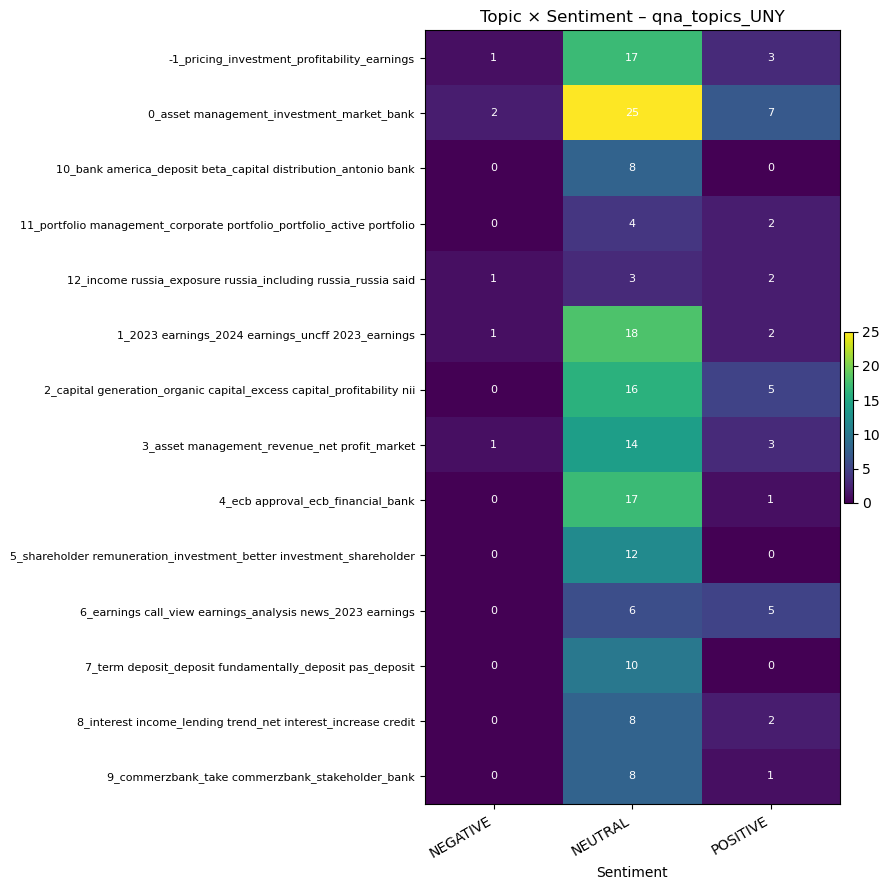

finbert_sentiment,NEGATIVE,NEUTRAL,POSITIVE
topic_full,,,
-1_pricing_investment_profitability_earnings,1,17,3
0_asset management_investment_market_bank,2,25,7
10_bank america_deposit beta_capital distribution_antonio bank,0,8,0
11_portfolio management_corporate portfolio_portfolio_active portfolio,0,4,2
12_income russia_exposure russia_including russia_russia said,1,3,2
1_2023 earnings_2024 earnings_uncff 2023_earnings,1,18,2
2_capital generation_organic capital_excess capital_profitability nii,0,16,5
3_asset management_revenue_net profit_market,1,14,3
4_ecb approval_ecb_financial_bank,0,17,1


In [9]:
topic_sentiment_heatmap(
    r"qna/qna_topics_UNY.xlsx",
    topic_col="reduced_topic",   # full label, not truncated
    top_n=15                     # adjust as needed
) 